# 1.6.1 Meanshift and Camshift

In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [51]:
cap = cv2.VideoCapture('monitoring_720p.mp4')

In [72]:
# take first frame of the video
ret,frame = cap.read()

In [73]:
print(ret)

True


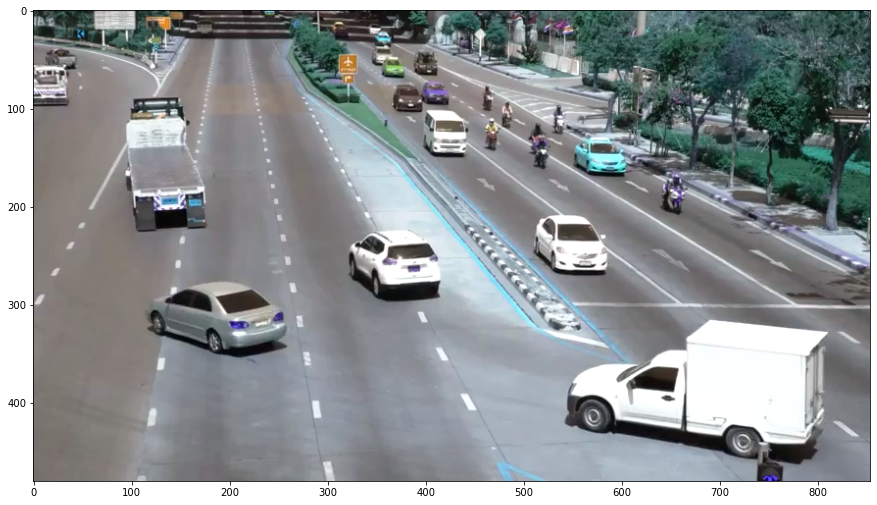

In [74]:
plt.figure(figsize = (15,15))
plt.imshow(frame)
plt.show()

In [75]:
# setup initial location of window
r,h,c,w = 200,76,515,72 # simply hardcoded the values
track_window = (c,r,w,h)

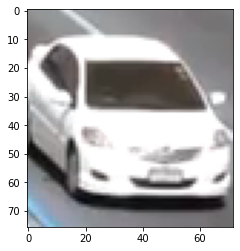

In [76]:
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
plt.imshow(roi)
plt.show()

In [77]:
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

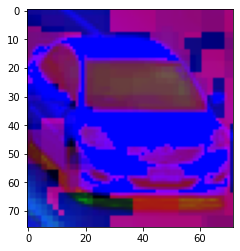

In [78]:
# set up the ROI for tracking
plt.imshow(hsv_roi)
plt.show()

In [79]:
mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

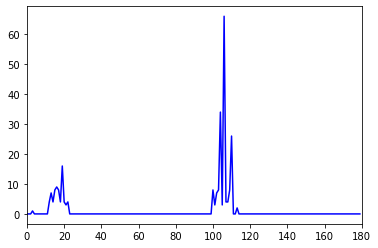

In [80]:
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
plt.plot(roi_hist, color = 'b')
plt.xlim([0,180])
plt.show()

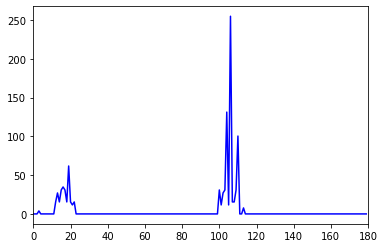

In [81]:
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
plt.plot(roi_hist, color = 'b')
plt.xlim([0,180])
plt.show()

In [82]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

In [83]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

## Camshift

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [23]:
cap = cv2.VideoCapture('monitoring_720p.avi')

In [24]:
# take first frame of the video
ret,frame = cap.read()

In [25]:
# setup initial location of window
r,h,c,w = 150,76,594,72 # simply hardcoded the values
track_window = (c,r,w,h)

In [26]:
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0,255,cv2.NORM_MINMAX)

In [27]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

In [28]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()